In [36]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import co


%matplotlib inline

In [2]:
#Loading the data
train = pd.read_csv(r"E:\Dataset\Santander Customer Transaction Prediction\train.csv")
test = pd.read_csv(r"E:\Dataset\Santander Customer Transaction Prediction\test.csv")

In [3]:
train.shape,test.shape

((200000, 202), (200000, 201))

In [64]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [72]:
#No missing values
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [5]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [6]:
y_train = train['target']
X_train = train.drop(['ID_code','target'],axis = 1)

In [7]:
X_train.shape,y_train.shape

((200000, 200), (200000,))

In [10]:
#Splitting data into train and validation set
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((144000, 200), (144000,), (16000, 200), (16000,))

In [54]:
#Model building
clf_dt = DecisionTreeClassifier(random_state=42,class_weight='balanced') 
params ={'criterion':['gini','entropy'],
         'max_depth':[1,2,3,4,5,6,7,8,9,10],
         #'max_leaf_nodes':[8,16,32],
         'max_features':['log2','sqrt']
        } 

In [55]:
#Hyperparameter tuning
models_rsv = RandomizedSearchCV(estimator = clf_dt,
                            param_distributions = params,
                            n_iter = 10,
                            n_jobs = -1,
                            cv = 5, 
                            verbose= 10,
                            scoring= 'roc_auc')
models_rsv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['log2', 'sqrt']},
                   scoring='roc_auc', verbose=10)

In [61]:
models_rsv.best_estimator_,models_rsv.best_score_

(DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=8, max_features='sqrt', random_state=42),
 0.6355096143527917)

In [58]:
#Final model 
#Checking weather final model overfits or not
model = DecisionTreeClassifier(class_weight='balanced',
                               criterion='entropy',
                               max_depth=8,
                               #max_leaf_nodes= ?,
                               max_features='sqrt',
                               random_state=42)
model.fit(X_train,y_train)
pred_val = model.predict_proba(X_val)
pred_train = model.predict_proba(X_train)

print("Train score: {}\nValidation score: {}".format(roc_auc_score(y_train.values,pred_train[:,1]),
                roc_auc_score(y_val.values,pred_val[:,1])))

Train score: 0.6694942231748183
Validation score: 0.6424265285778495


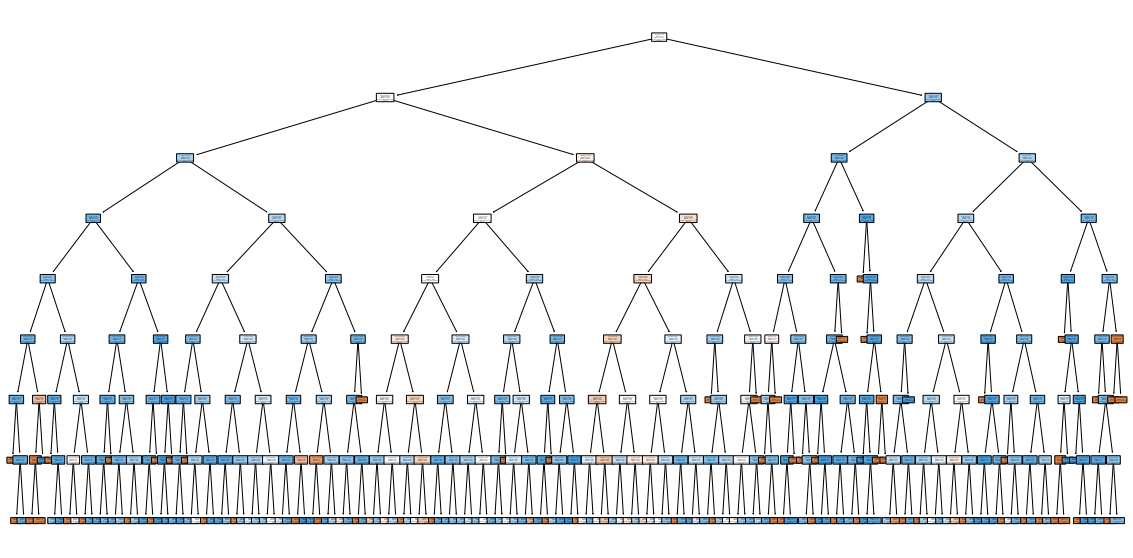

In [63]:
plt.figure(figsize = (20,10))
plot_tree(model,
          feature_names = X_train.columns,
          class_names = ["0","1"],
          rounded = True,
          filled = True)
plt.show()

> There is other ways to plot the tree, Take a lot at the refrence </br>
> click here - https://mljar.com/blog/visualize-decision-tree/